In [1]:
from pretty_plot import *

In [2]:
def check_bench(first, second, first_name='LFP countermodels turned off',
                second_name='LFP countermodels turned on', bench=10):
    X = 0
    Y = 0
    for i in range(len(first)):
        if first[i] > bench:
            X += 1
            if second[i] < first[i]:
                Y += 1
    print('Of the {} tests which took more than {} seconds to run with {},'.format(X, bench, first_name))
    print('{} were faster with {}.'.format(Y, second_name))

In [3]:
# Process main results
names, results_cex = process_done('cex_out.txt')
cex = [results_cex[name][0] for name in names]
cex_max = max(cex)

## 1. No counterexamples

In [4]:
# Process comparison
_, results_nocex = process_done('no-true-cex.txt')
nocex = [results_nocex[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

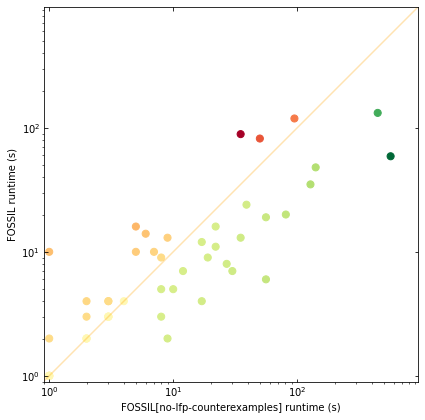

Of the 20 tests which took more than 10 seconds to run with LFP countermodels turned off,
17 were faster with LFP countermodels turned on.


In [5]:
# Plot
m = max([max(nocex), cex_max])
x = adjust(nocex, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[no-lfp-counterexamples]', tm_val=m+1)
check_bench(x, y)

<Figure size 432x288 with 0 Axes>

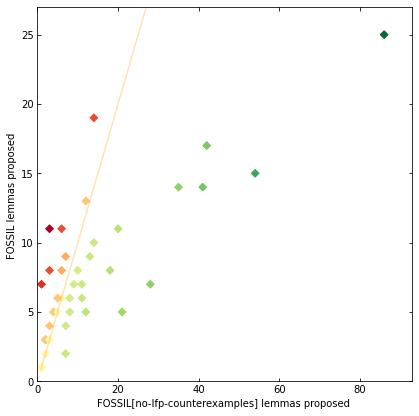

In [6]:
# Plot lemma proposals
cex_prop = [results_cex[name][1] for name in names]
nocex_prop = [results_nocex[name][1] for name in names]
m = max([max(nocex_prop), max(cex_prop)])
x = adjust(nocex_prop, mx=m)
y = adjust(cex_prop, mx=m)
pretty_plot(x, y, x_name='FOSSIL[no-lfp-counterexamples]', tm_val=m+1, mark='D',
            log=False, square=False, measurement='lemmas proposed', unit=None)

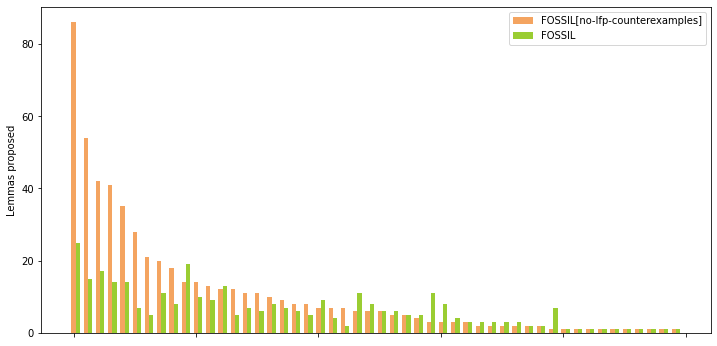

In [7]:
# Alternative plot to above scatterplot for lemmas proposed
import matplotlib.pyplot as plt

y = [y for _, y in sorted(zip(x, y), reverse=True)]
x = sorted(x, reverse=True)

N = len(names)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind, x, width, color='sandybrown')
rects2 = ax.bar(ind + width, y, width, color='yellowgreen')

ax.set_ylabel('Lemmas proposed')
ax.set_title('')
ax.set_xticklabels([])

ax.legend((rects1[0], rects2[0]), ('FOSSIL[no-lfp-counterexamples]', 'FOSSIL'))
plt.show()

## 2. CVC4Sy

In [8]:
# Process comparison
_, results_cvc4sy = process_done('cvc4sy.txt')
cvc4sy = [results_cvc4sy[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

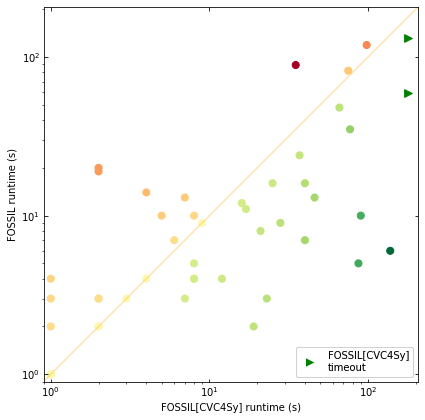

Of the 22 tests which took more than 10 seconds to run with CVC4Sy,
19 were faster with minisy.


In [9]:
# Plot
m = max([max(cvc4sy), cex_max])
x = adjust(cvc4sy, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[CVC4Sy]')
check_bench(x, y, first_name='CVC4Sy', second_name='minisy')

## 3. Streaming

In [10]:
# Process comparison
_, results_streaming = process_done('streaming.txt')
streaming = [results_streaming[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

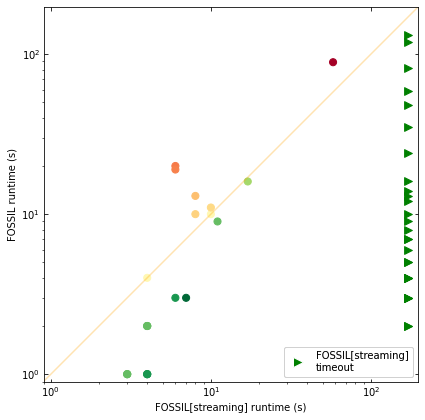

Of the 32 tests which took more than 10 seconds to run with streaming enabled,
31 were faster with streaming disabled.


In [11]:
# Plot
m = max([max(streaming), cex_max])
x = adjust(streaming, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[streaming]', y_leg='upper left')
check_bench(x, y, first_name='streaming enabled', second_name='streaming disabled')